In [10]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Defining global plot aesthetics for consistency
sns.set_style("whitegrid")
sns.set_palette("pastel")
sns.set_context("talk") 

In [11]:

# Define the path to the CSV file
file_path = 'weather_test_data.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

loactions_weather_df = df.groupby(['Location'])[['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm']].mean()
locations_weather_df = loactions_weather_df.reset_index()
locations_weather_df.head()

,Location,MinTemp,MaxTemp,Temp9am,Temp3pm
0,Adelaide,12.874643,23.337500,17.311868,21.972887
1,Albany,13.048097,20.219078,16.311321,18.584125
2,Albury,9.579700,22.881473,14.530370,21.622465
3,AliceSprings,12.905811,29.124808,21.212390,27.892645
4,BadgerysCreek,11.146833,24.163318,16.643552,22.636281


In [12]:
# Function to show the missing data and pre-process the dataset
def load_and_preprocess_data(file_path):
    df = pd.read_csv(file_path)
    print("Initial Missing Data Report:")
    missing_count = df.isnull().sum()
    missing_percentage = (missing_count / len(df)) * 100
    
    for col in df.columns:
        print(f"{col}: {missing_count[col]} missing values ({missing_percentage[col]:.2f}%)")

    for col in df.columns:
        if df[col].dtype == 'float64' or df[col].dtype == 'int64':
            if missing_count[col] > 0:
                mean_value = df[col].mean()
                df[col].fillna(mean_value, inplace=True)
                print(f"Filled missing numerical values in '{col}' with the mean: {mean_value:.2f}")
        elif df[col].dtype == 'object':
            if missing_count[col] > 0:
                mode_value = df[col].mode()[0]
                df[col].fillna(mode_value, inplace=True)
                print(f"Filled missing categorical values in '{col}' with the mode: {mode_value}")

    return df

In [13]:
# Loading the dataset
file_path = 'weather_test_data.csv'
df = load_and_preprocess_data(file_path)

Initial Missing Data Report:
row ID: 0 missing values (0.00%)
Location: 0 missing values (0.00%)
MinTemp: 194 missing values (0.45%)
MaxTemp: 92 missing values (0.22%)
Rainfall: 427 missing values (1.00%)
Evaporation: 18312 missing values (42.91%)
Sunshine: 20499 missing values (48.03%)
WindGustDir: 2809 missing values (6.58%)
WindGustSpeed: 2790 missing values (6.54%)
WindDir9am: 3007 missing values (7.05%)
WindDir3pm: 1130 missing values (2.65%)
WindSpeed9am: 413 missing values (0.97%)
WindSpeed3pm: 795 missing values (1.86%)
Humidity9am: 541 missing values (1.27%)
Humidity3pm: 1104 missing values (2.59%)
Pressure9am: 4266 missing values (10.00%)
Pressure3pm: 4245 missing values (9.95%)
Cloud9am: 16085 missing values (37.69%)
Cloud3pm: 17092 missing values (40.05%)
Temp9am: 290 missing values (0.68%)
Temp3pm: 822 missing values (1.93%)
RainToday: 427 missing values (1.00%)
Filled missing numerical values in 'MinTemp' with the mean: 12.21
Filled missing numerical values in 'MaxTemp' w

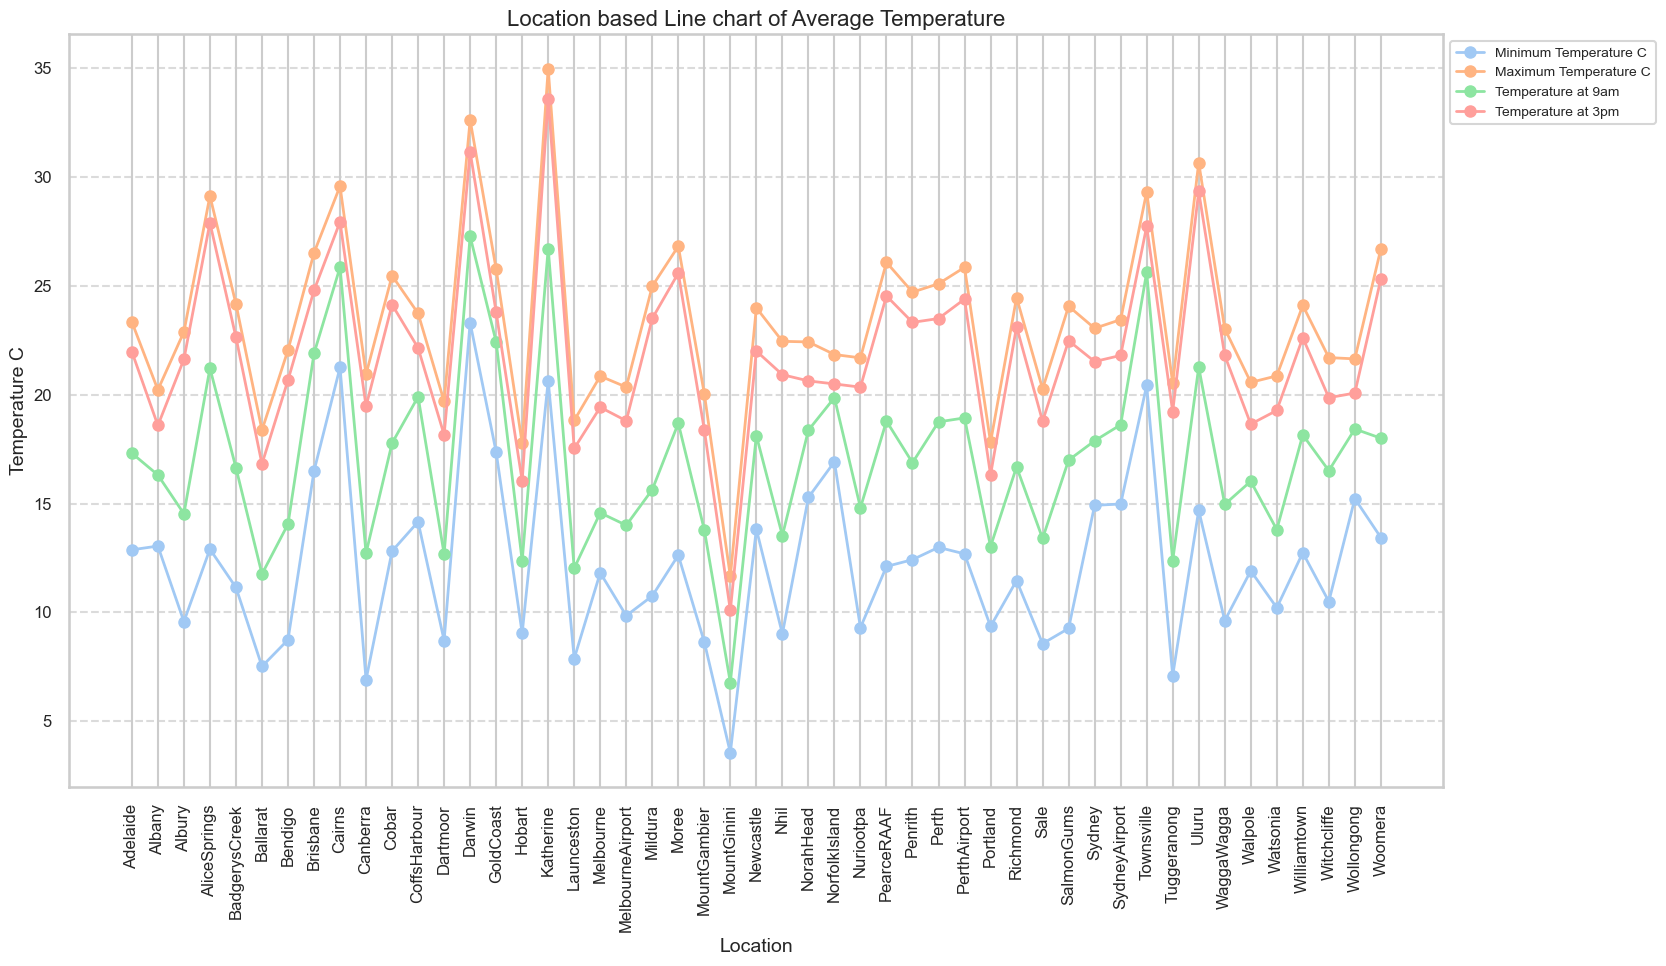

In [14]:
# Define x and y values (replace 'locations_weather_df' with your actual DataFrame name)
x = locations_weather_df['Location']
y1 = locations_weather_df['MinTemp'] 
y2 = locations_weather_df['MaxTemp']
y3 = locations_weather_df['Temp9am'] 
y4 = locations_weather_df['Temp3pm']

# Adjust the figure size to ensure it's wide enough for all locations
plt.figure(figsize=(20, 10))  # Width, Height in inches

# Plot each set of y-values with clearer markers and lines
plt.plot(x, y1, label='Minimum Temperature C', marker='o', markersize=8, linewidth=2) 
plt.plot(x, y2, label='Maximum Temperature C', marker='o', markersize=8, linewidth=2) 
plt.plot(x, y3, label='Temperature at 9am', marker='o', markersize=8, linewidth=2) 
plt.plot(x, y4, label='Temperature at 3pm', marker='o', markersize=8, linewidth=2)

# Labeling and titling with larger font sizes
plt.xlabel('Location', fontsize=14)
plt.ylabel('Temperature C', fontsize=14)
plt.title('Location based Line chart of Average Temperature', fontsize=16)

# Enhance the legend by positioning it outside the plot area
plt.legend(fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))

# Rotate the x-axis labels for better readability and increase their font size
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

# Adding gridlines for better readability of values
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust the plot layout to fit the rotated x-axis labels and the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Left, Bottom, Right, Top

# Display the plot
plt.show()

In [15]:
humidity_df = df.groupby(['Location'])[['Humidity9am', 'Humidity3pm']].mean()
humidity = humidity_df.reset_index()
humidity.head()

,Location,Humidity9am,Humidity3pm
0,Adelaide,58.562042,44.406357
1,Albany,74.700597,63.434059
2,Albury,73.587311,47.351666
3,AliceSprings,39.140351,23.701313
4,BadgerysCreek,77.127346,52.026137


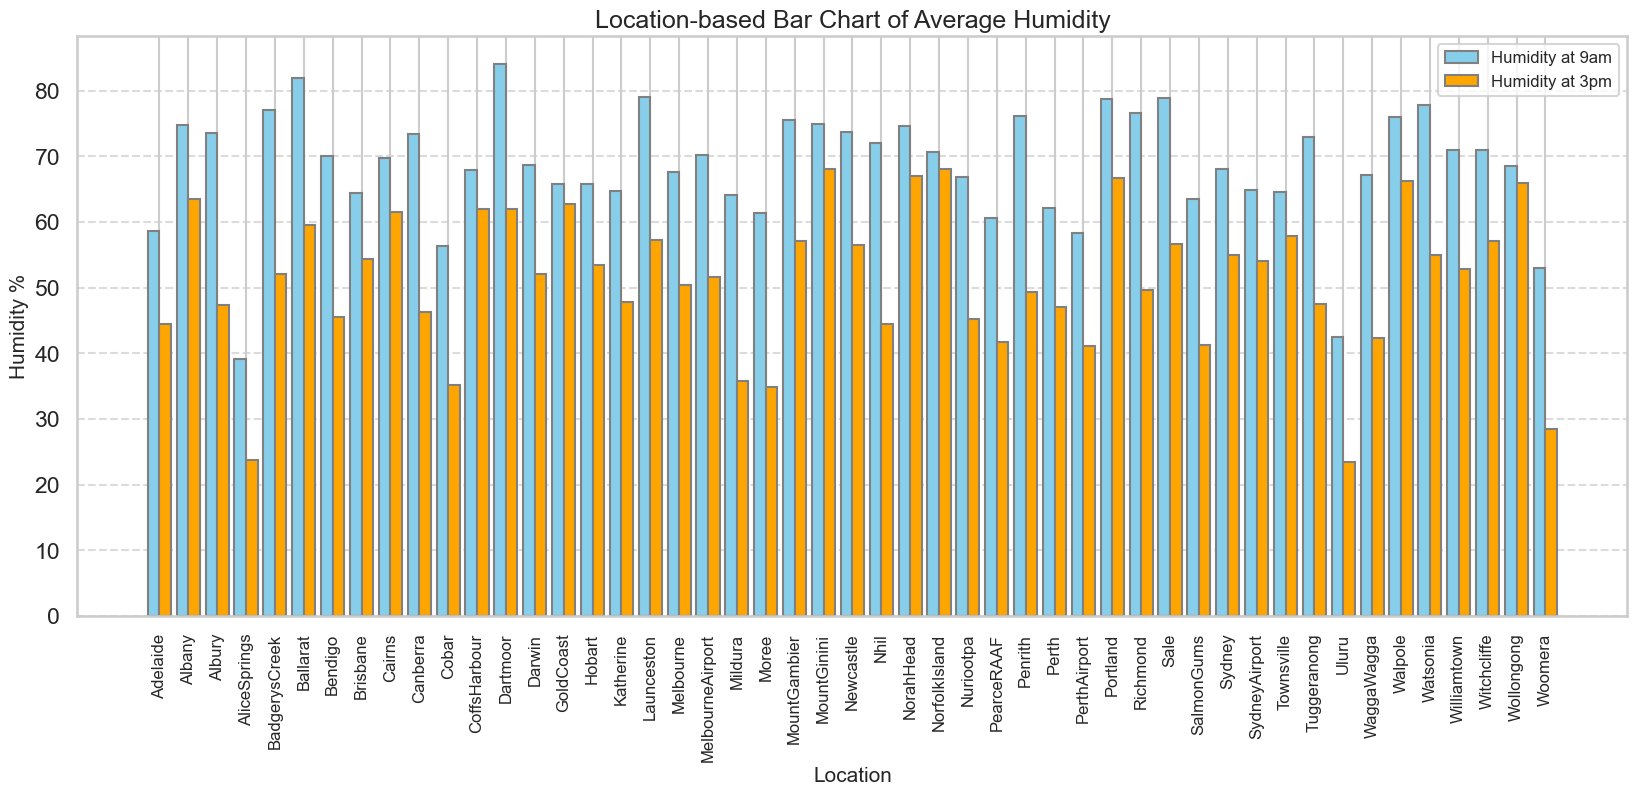

In [16]:
# Group the data by location and calculate the mean humidity at 9am and 3pm
# Using a list instead of a tuple to avoid the ValueError
humidity_by_location = df.groupby('Location')[['Humidity9am', 'Humidity3pm']].mean().reset_index()

# Create a figure and axis with a shared y-axis
fig, ax1 = plt.subplots(figsize=(20, 10))

# Set the positions of the bars on the x-axis
locations = humidity_by_location['Location']
x = np.arange(len(locations))

# Width of a bar 
width = 0.4

# Plotting the bars side by side
ax1.bar(x - width/2, humidity_by_location['Humidity9am'], width, label='Humidity at 9am', color='skyblue', edgecolor='grey')
ax1.bar(x + width/2, humidity_by_location['Humidity3pm'], width, label='Humidity at 3pm', color='orange', edgecolor='grey')

# Labeling and styling
ax1.set_xlabel('Location', fontsize=15)
ax1.set_ylabel('Humidity %', fontsize=15)
ax1.set_title('Location-based Bar Chart of Average Humidity', fontsize=18)
ax1.set_xticks(x)
ax1.set_xticklabels(locations, rotation=90, fontsize=12)
ax1.legend(fontsize=12)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Adding spacing to the bottom to accommodate the rotated x-axis labels
plt.subplots_adjust(bottom=0.3)

# Show the plot
plt.show()

c:\Users\aakpk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


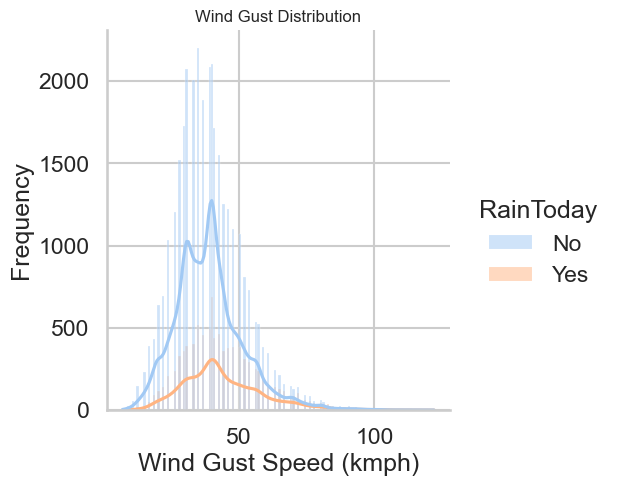

In [17]:
sns.displot(df, x="WindGustSpeed", hue='RainToday', kde=True, fill=True)
plt.title("Wind Gust Distribution", fontsize = 12)
plt.xlabel('Wind Gust Speed (kmph)')
plt.ylabel('Frequency')
plt.show()

c:\Users\aakpk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\aakpk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Humidity (%) 9am')

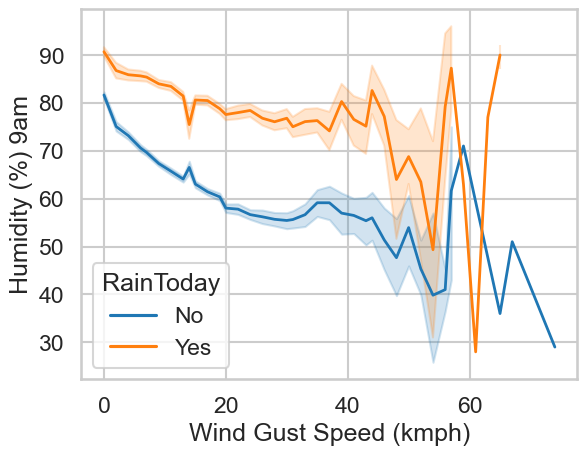

In [18]:
sns.lineplot(x="WindSpeed9am",y="Humidity9am",hue="RainToday",data=df, palette="tab10", linewidth=2)
plt.xlabel('Wind Gust Speed (kmph)')
plt.ylabel('Humidity (%) 9am')

c:\Users\aakpk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Frequency')

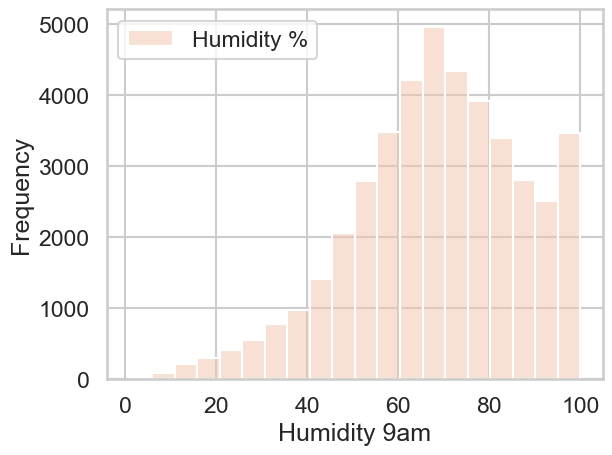

In [19]:
sns.histplot(df['Humidity9am'],color='#F3C5AB', bins=20, alpha=0.5, label='Humidity %')
plt.legend()
plt.xlabel('Humidity 9am')
plt.ylabel('Frequency')

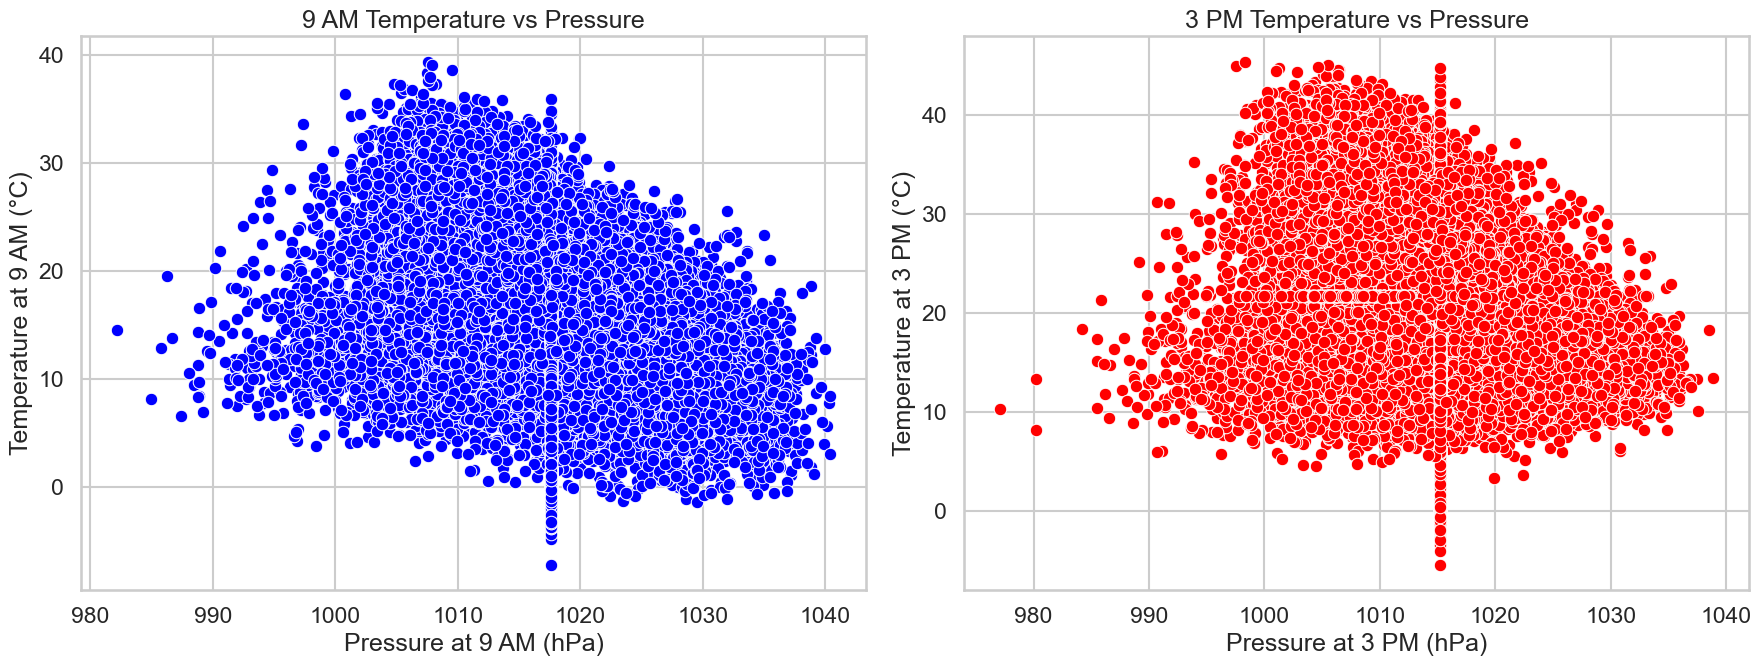

In [20]:
# Setting up a matplotlib figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# Scatter plot for 9 AM temperature vs pressure
sns.scatterplot(x='Pressure9am', y='Temp9am', data=df, ax=ax1, color='blue')
ax1.set_title('9 AM Temperature vs Pressure')
ax1.set_xlabel('Pressure at 9 AM (hPa)')
ax1.set_ylabel('Temperature at 9 AM (°C)')

# Scatter plot for 3 PM temperature vs pressure
sns.scatterplot(x='Pressure3pm', y='Temp3pm', data=df, ax=ax2, color='red')
ax2.set_title('3 PM Temperature vs Pressure')
ax2.set_xlabel('Pressure at 3 PM (hPa)')
ax2.set_ylabel('Temperature at 3 PM (°C)')

# Displaying the plots
plt.tight_layout()
plt.show()